# LOGISTIC REGRESSION

## Diabetes Prediction (Binary Classification)

### Objective

The objective of this assignment is to build a Logistic Regression model to predict whether a person has diabetes (Outcome = 1) or not (Outcome = 0) using medical predictor variables.

---------------------------------------------------

### 1. Data Exploration (EDA)
#### a. Load Dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Observations

Dataset contains 768 rows and 9 columns

All variables are numeric

Target variable Outcome is binary

Some medical features contain zero values, which are invalid

----------

#### c. Visualizations
Outcome Distribution

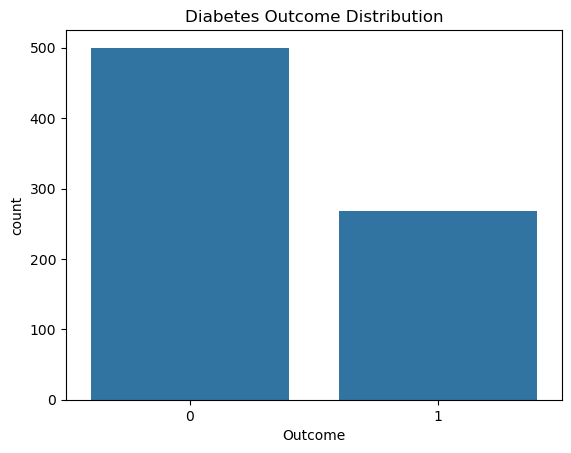

In [13]:
sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Outcome Distribution")
plt.show()


----

Correlation Heatmap

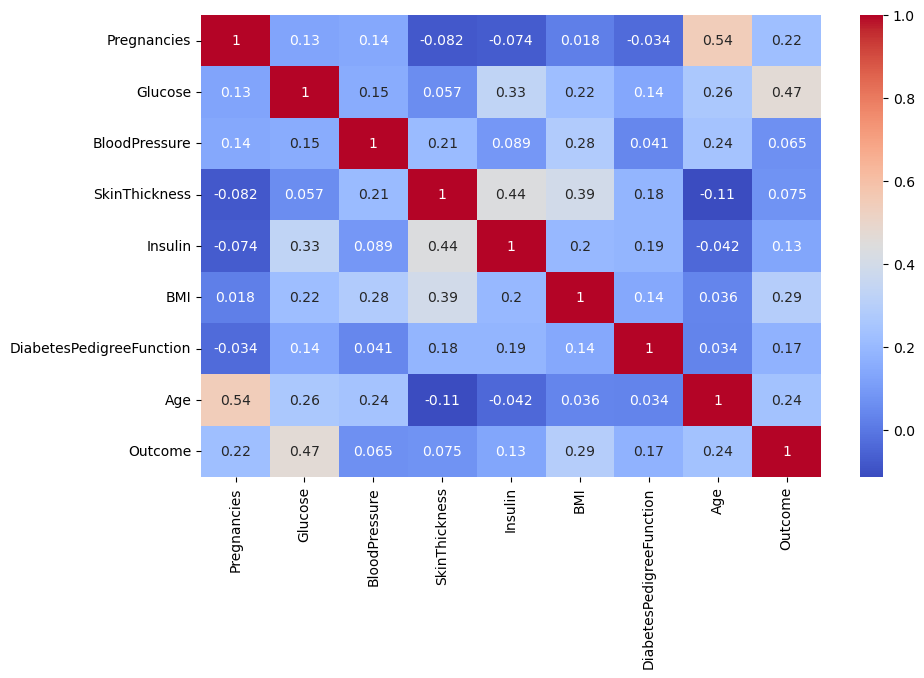

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


#### EDA Insights

Glucose, BMI, and Age show strong correlation with Outcome

Zero values present in Glucose, BloodPressure, Insulin, SkinThickness, BMI

Class imbalance is moderate

-----

### 2. Data Preprocessing
#### a. Handle Missing Values (Zero → NaN)

In [20]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols] = df[cols].replace(0, np.nan)


Impute with Median

In [23]:
df[cols] = df[cols].fillna(df[cols].median())


#### b. Split Features & Target

In [26]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']


Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


--------

### 3. Model Building
Train-Test Split

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


Logistic Regression Model

In [36]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

---

### 4. Model Evaluation
Predictions

In [39]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]


Classification Metrics

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Accuracy: 0.7532467532467533
Precision: 0.6666666666666666
Recall: 0.6181818181818182
F1 Score: 0.6415094339622641
ROC-AUC: 0.8229568411386594


Confusion Matrix

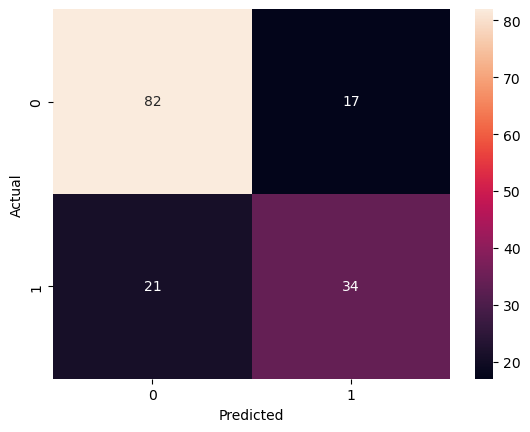

In [47]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


ROC Curve

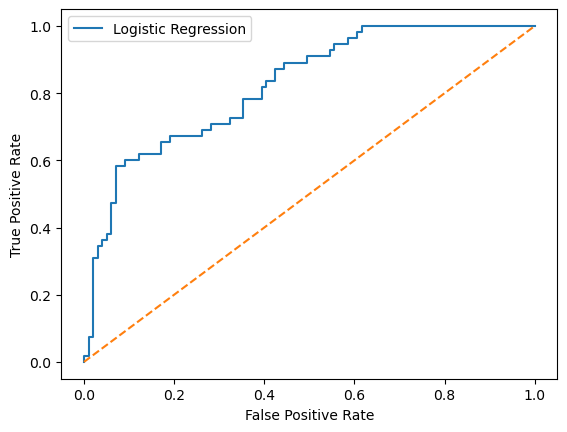

In [50]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


-----

### 5. Interpretation
#### a. Model Coefficients

In [54]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

coefficients


,Feature,Coefficient
1,Glucose,1.114496
5,BMI,0.683509
7,Age,0.401210
0,Pregnancies,0.226785
6,DiabetesPedigreeFunction,0.200471
3,SkinThickness,0.071687
4,Insulin,-0.135922
2,BloodPressure,-0.151407


----

#### Interpretation

Glucose & BMI → Strongest positive impact on diabetes

Age → Higher age increases diabetes probability

Negative coefficients → Reduce diabetes likelihood

#### b. Feature Significance

Glucose is the most influential predictor

BMI and Age are strong indicators

Logistic regression coefficients represent log-odds

-----

## Interview Questions
### 1. Difference Between Precision and Recall

Precision: Out of predicted positives, how many are actually positive

Recall: Out of actual positives, how many were correctly predicted

Precision is important when false positives are costly,
Recall is important when missing positives is dangerous (e.g., disease detection).

### 2. What is Cross-Validation?

Cross-validation:

Splits data into multiple folds

Trains and tests model multiple times

Reduces overfitting

Gives robust performance estimates

Especially important in binary classification with limited data.